In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("/Users/gurchetansingh/HR-analysis/HR_comma_sep.csv")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
data["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
train = data[:10000]
test = data[10000:]

In [8]:
sales_dummies_train = pd.get_dummies(train["sales"])
sales_dummies_test = pd.get_dummies(test["sales"])

train.drop(["sales"], axis = 1, inplace=True)
test.drop(["sales"], axis = 1, inplace=True)

train = train.join(sales_dummies_train)
test = test.join(sales_dummies_test)

train.head()

/Users/gurchetansingh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/gurchetansingh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0


In [9]:
salary_dummies_train = pd.get_dummies(train["salary"])
salary_dummies_test = pd.get_dummies(test["salary"])
train.drop(["salary"], axis = 1, inplace=True)
test.drop(["salary"], axis = 1, inplace=True)
train = train.join(salary_dummies_train)
test = test.join(salary_dummies_test)
train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [10]:
X_train = train.drop("left", axis=1)
Y_train = train["left"]
X_test = test.drop("left", axis=1)
Y_test = test["left"]

print X_train.info()
print X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
satisfaction_level       10000 non-null float64
last_evaluation          10000 non-null float64
number_project           10000 non-null int64
average_montly_hours     10000 non-null int64
time_spend_company       10000 non-null int64
Work_accident            10000 non-null int64
promotion_last_5years    10000 non-null int64
IT                       10000 non-null uint8
RandD                    10000 non-null uint8
accounting               10000 non-null uint8
hr                       10000 non-null uint8
management               10000 non-null uint8
marketing                10000 non-null uint8
product_mng              10000 non-null uint8
sales                    10000 non-null uint8
support                  10000 non-null uint8
technical                10000 non-null uint8
high                     10000 non-null uint8
low                      10000 non-null uint8
medium        

In [11]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

print(logreg.score(X_test, Y_test))

0.632726545309


In [12]:
svc = SVC()

svc.fit(X_train, Y_train)

svc.score(X_train, Y_train)
svc.score(X_test, Y_test)

0.93618723744748955

In [13]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

random_forest.score(X_train, Y_train)
random_forest.score(X_test, Y_test)

0.99519903980796154

In [14]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)

knn.score(X_test, Y_test)

0.92938587717543508

In [15]:
gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)


gaussian.score(X_test, Y_test)

0.78315663132626523

In [16]:
predictions_model = random_forest


[ 0  4  2  3  1  5 18 17 14 16 15 19  8  7  9 12 10 13 11  6]
1. satisfaction_level (0.320924)
2. time_spend_company (0.187115)
3. number_project (0.174461)
4. average_montly_hours (0.150806)
5. last_evaluation (0.124760)
6. Work_accident (0.010144)
7. low (0.005272)
8. high (0.003438)
9. sales (0.003177)
10. technical (0.003113)
11. support (0.002893)
12. medium (0.002888)
13. RandD (0.001861)
14. IT (0.001746)
15. accounting (0.001598)
16. marketing (0.001402)
17. hr (0.001378)
18. product_mng (0.001208)
19. management (0.001195)
20. promotion_last_5years (0.000620)


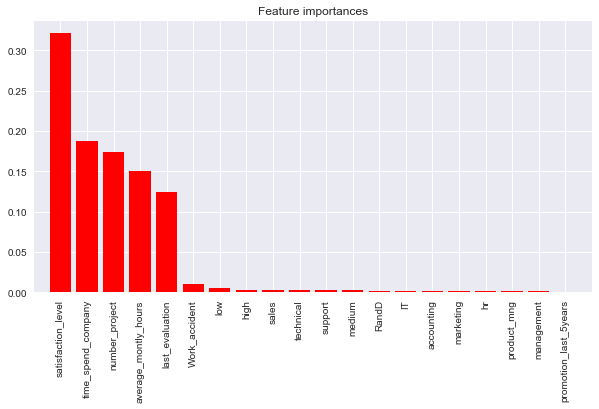

In [30]:
coeff=predictions_model.feature_importances_
indices = np.argsort(coeff)[::-1]
print indices
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], coeff[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), coeff[indices],
       color="r",  align="center")
plt.xticks(range(X_train.shape[1]), X_train[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()